#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [3]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [10]:
#卷積層1

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [12]:
model.add(Dropout(rate=0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷積層2與池化層2

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [19]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [24]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [25]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                         validation_split=0.25,
                         epochs=12, batch_size=128, verbose=1)

Epoch 1/12
293/293 [==============================] - 108s 365ms/step - loss: 0.0908 - accuracy: 0.0978 - val_loss: 0.0901 - val_accuracy: 0.1090
Epoch 2/12
293/293 [==============================] - 103s 353ms/step - loss: 0.0903 - accuracy: 0.1022 - val_loss: 0.0899 - val_accuracy: 0.1263
Epoch 3/12
293/293 [==============================] - 103s 351ms/step - loss: 0.0901 - accuracy: 0.1090 - val_loss: 0.0899 - val_accuracy: 0.1245
Epoch 4/12
293/293 [==============================] - 105s 357ms/step - loss: 0.0900 - accuracy: 0.1136 - val_loss: 0.0898 - val_accuracy: 0.1221
Epoch 5/12
293/293 [==============================] - 104s 354ms/step - loss: 0.0899 - accuracy: 0.1139 - val_loss: 0.0897 - val_accuracy: 0.1255
Epoch 6/12
293/293 [==============================] - 102s 348ms/step - loss: 0.0897 - accuracy: 0.1247 - val_loss: 0.0896 - val_accuracy: 0.1294
Epoch 7/12
293/293 [==============================] - 102s 348ms/step - loss: 0.0897 - accuracy: 0.1268 - val_loss: 0.0896 -

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

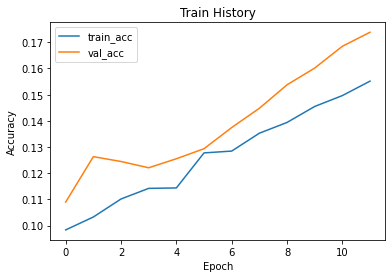

In [29]:
show_train_history('accuracy','val_accuracy')

In [32]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [33]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                         validation_split=0.25,
                         epochs=12, batch_size=128, verbose=1)

Epoch 1/12
293/293 [==============================] - 101s 344ms/step - loss: 0.4075 - accuracy: 0.1453 - val_loss: 0.3613 - val_accuracy: 0.1960
Epoch 2/12
293/293 [==============================] - 100s 343ms/step - loss: 0.3267 - accuracy: 0.1701 - val_loss: 0.3564 - val_accuracy: 0.2455
Epoch 3/12
293/293 [==============================] - 100s 342ms/step - loss: 0.3202 - accuracy: 0.1888 - val_loss: 0.3515 - val_accuracy: 0.2612
Epoch 4/12
293/293 [==============================] - 100s 340ms/step - loss: 0.3141 - accuracy: 0.2125 - val_loss: 0.3465 - val_accuracy: 0.2750
Epoch 5/12
293/293 [==============================] - 101s 344ms/step - loss: 0.3091 - accuracy: 0.2269 - val_loss: 0.3416 - val_accuracy: 0.2809
Epoch 6/12
293/293 [==============================] - 100s 342ms/step - loss: 0.3050 - accuracy: 0.2417 - val_loss: 0.3375 - val_accuracy: 0.2901
Epoch 7/12
293/293 [==============================] - 100s 340ms/step - loss: 0.3029 - accuracy: 0.2483 - val_loss: 0.3350 -

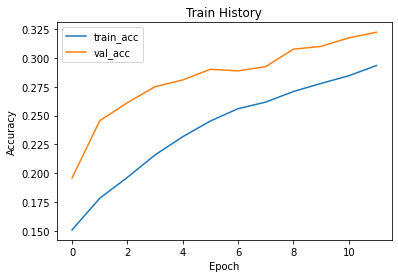

In [34]:
show_train_history('accuracy','val_accuracy')